In [62]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [63]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [64]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [65]:
pd.crosstab(df['Churn'], df['Contract'])

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [66]:
label_encoder = LabelEncoder()
categorical_columns = ['tenure', 'InternetService', 'Contract', 'Churn']
df2 = df[categorical_columns]
for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df2[column])
df2

,tenure,InternetService,Contract,Churn
0,1,0,0,0
1,34,0,1,0
2,2,0,0,1
3,45,0,1,0
4,2,1,0,1
...,...,...,...,...
7038,24,0,1,0
7039,72,1,1,0
7040,11,0,0,0
7041,4,1,0,1


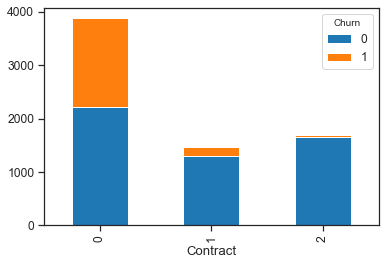

In [67]:
df2.pivot_table('tenure', 'Contract', 'Churn', 'count').plot(kind='bar', stacked=True)

In [68]:
data_for_train = df2[['tenure', 'InternetService', 'Contract']]
data_for_train

,tenure,InternetService,Contract
0,1,0,0
1,34,0,1
2,2,0,0
3,45,0,1
4,2,1,0
...,...,...,...
7038,24,0,1
7039,72,1,1
7040,11,0,0
7041,4,1,0


In [69]:
target_vector = df2['Churn']
target_vector

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

#### Classification and regression trees

In [70]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
data_for_train, target_vector, test_size=0.2, random_state=42)

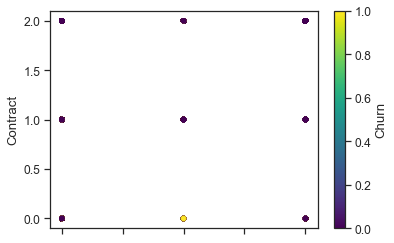

In [71]:
ax2 = df2.plot.scatter(x='InternetService',
                       y='Contract',
                       c='Churn',
                       colormap='viridis')

In [72]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
clf_tree.fit(data_for_train, target_vector)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [73]:
predictions1 = clf_tree.predict(X_test)
metrics.accuracy_score(y_test, predictions1)

0.7799858055358411

In [74]:
final = X_test
final['result'] = predictions1.tolist()
final

,tenure,InternetService,Contract,result
185,1,0,0,1
2715,41,2,0,0
3825,52,2,2,0
1807,1,1,0,1
132,67,0,2,0
...,...,...,...,...
6366,64,0,2,0
315,51,1,1,0
2439,17,2,1,0
5002,69,0,2,0


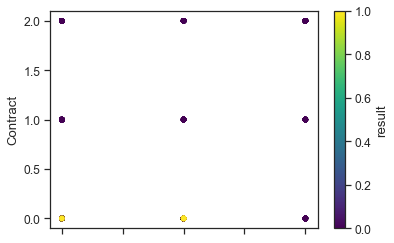

In [75]:
ax3 = final.plot.scatter(x='InternetService',
                       y='Contract',
                       c='result',
                       colormap='viridis')

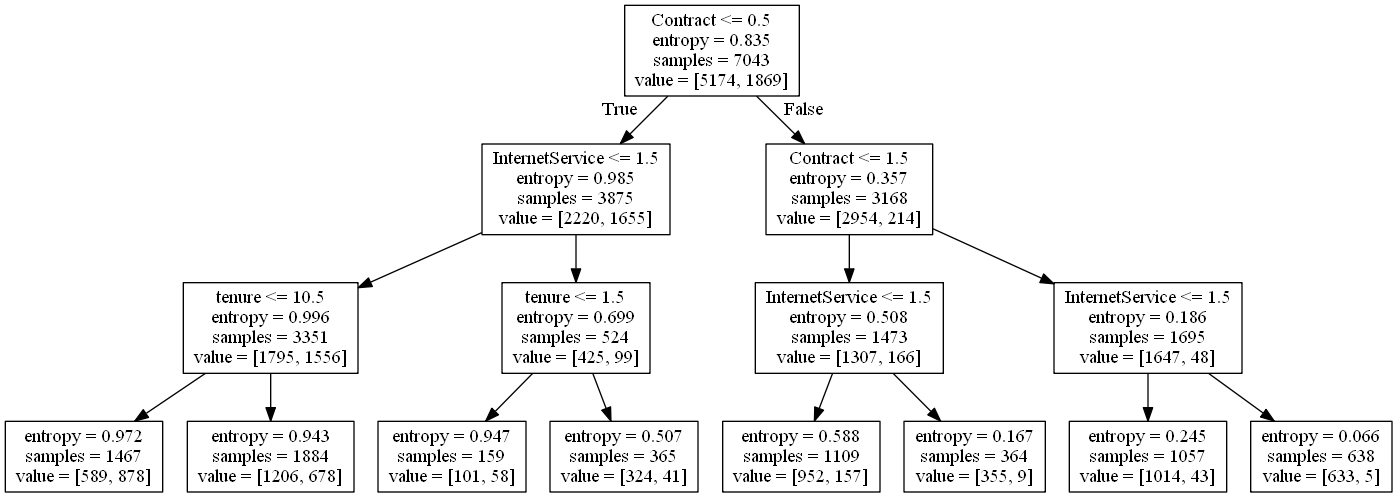

In [76]:
from sklearn.tree import export_graphviz
from IPython.display import Image

dotfile = open("small_tree.dot", 'w')
export_graphviz(clf_tree, out_file = dotfile, feature_names = ['tenure', 'InternetService', 'Contract'])
dotfile.close()
!dot -Tpng "small_tree.dot" -o "small_tree.png"
Image(filename='small_tree.png') 

#### Logistic Regression

(1.0, 10000.0)

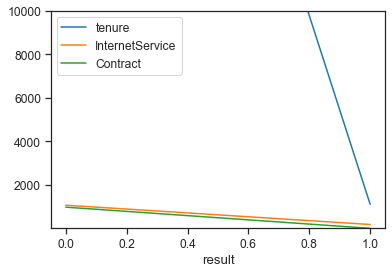

In [77]:
final_reg = final[[x for x in final.columns]]
final_reg.groupby('result').sum().plot()
plt.ylim((1.0,10000))

In [78]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
data_for_train, target_vector, test_size=0.2, random_state=42)

X = X_train
Y = y_train
logistic = LogisticRegression()
logistic.fit(X, Y)
logistic.score(X, Y)
print('Coefficient: \n', logistic.coef_)
print('Intercept: \n', logistic.intercept_)
print('R² Value: \n', logistic.score(X, Y))

Coefficient: 
 [[-0.01622248 -0.08360487 -1.32788068]]
Intercept: 
 [0.05615337]
R² Value: 
 0.7389066382676607


In [79]:
predictions2 = logistic.predict(X_test)
metrics.accuracy_score(y_test, predictions2)

0.7374024130589071

In [80]:
result_logistic_regression = X_test
result_logistic_regression['result'] = predictions2.tolist()
result_logistic_regression

,tenure,InternetService,Contract,result
185,1,0,0,1
2715,41,2,0,0
3825,52,2,2,0
1807,1,1,0,0
132,67,0,2,0
...,...,...,...,...
6366,64,0,2,0
315,51,1,1,0
2439,17,2,1,0
5002,69,0,2,0


(1.0, 10000.0)

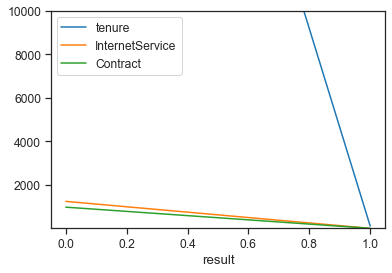

In [81]:
final_reg = result_logistic_regression[[x for x in result_logistic_regression.columns]]
final_reg.groupby('result').sum().plot()
plt.ylim((1.0,10000))

#### Linear Regression

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
data_for_train, target_vector, test_size=0.2, random_state=42)

(0.0, 80.0)

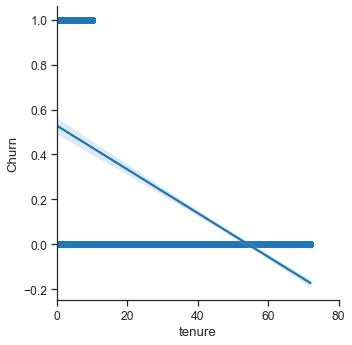

In [83]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('tenure','result', data=final)
plt.ylabel('Churn')
plt.xlabel('tenure')
plt.xlim((0,80))

In [84]:
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(
data_for_train, target_vector, test_size=0.2, random_state=42)

linear = linear_model.LinearRegression()
trainX = np.asarray(data_for_train).reshape(-1, 3)
trainY = target_vector
testX = np.asarray(X_test).reshape(-1, 3)
testY = y_test
linear.fit(trainX, trainY)
linear.score(trainX, trainY)
result = linear.score(trainX, trainY)
print(result)
predicted = linear.predict(testX)

0.17133061817090534


In [85]:
result_linear_regression = X_test
result_linear_regression['result'] = predicted.tolist()
result_linear_regression

,tenure,InternetService,Contract,result
185,1,0,0,0.473000
2715,41,2,0,0.329365
3825,52,2,2,-0.005929
1807,1,1,0,0.458885
132,67,0,2,-0.020976
...,...,...,...,...
6366,64,0,2,-0.012321
315,51,1,1,0.162850
2439,17,2,1,0.246830
5002,69,0,2,-0.026746


Text(0.5, 10.255999999999993, 'tenure')

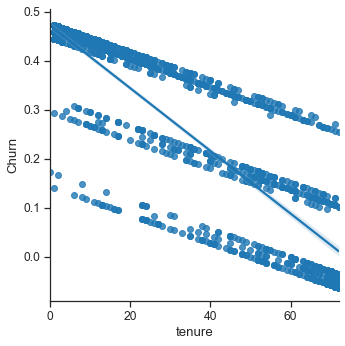

In [86]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('tenure','result', data=result_linear_regression)
plt.ylabel('Churn')
plt.xlabel('tenure')

#### k Nearest Neighbors

In [87]:
KNN_data = X_test
KNN_data['result'] = y_test.tolist()
KNN_data

,tenure,InternetService,Contract,result
185,1,0,0,1
2715,41,2,0,0
3825,52,2,2,0
1807,1,1,0,1
132,67,0,2,0
...,...,...,...,...
6366,64,0,2,0
315,51,1,1,0
2439,17,2,1,0
5002,69,0,2,0


Text(0.5, 10.255999999999993, 'tenure')

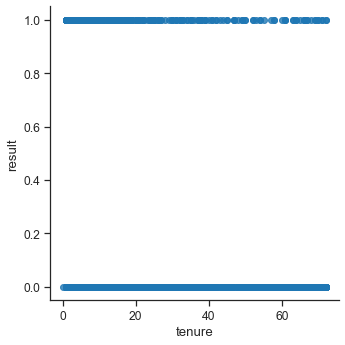

In [88]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('tenure','result', scatter=True, fit_reg=False, data=KNN_data)
plt.ylabel('result')
plt.xlabel('tenure')

In [89]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
data_for_train, target_vector, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [90]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)

0.7970191625266146

In [91]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.794889992902768

In [92]:
result_KNN = X_test
result_KNN['result'] = knn_pred.tolist()
result_KNN

,tenure,InternetService,Contract,result
185,1,0,0,1
2715,41,2,0,0
3825,52,2,2,0
1807,1,1,0,1
132,67,0,2,0
...,...,...,...,...
6366,64,0,2,0
315,51,1,1,0
2439,17,2,1,0
5002,69,0,2,0


Text(0.5, 10.255999999999993, 'X1')

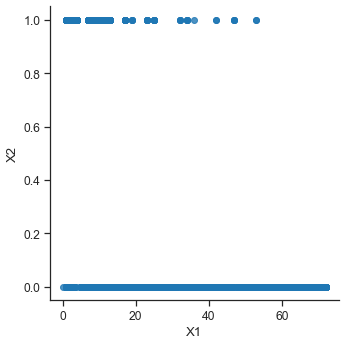

In [93]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('tenure','result', scatter=True, fit_reg=False, data=result_KNN)
plt.ylabel('X2')
plt.xlabel('X1')

#### Random Forest

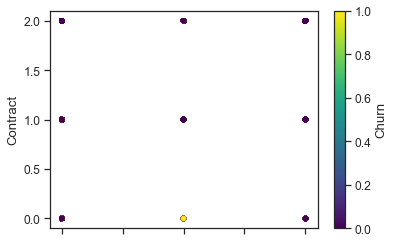

In [94]:
ax4 = df2.plot.scatter(x='InternetService',
                       y='Contract',
                       c='Churn',
                       colormap='viridis')

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
data_for_train, target_vector, test_size=0.2, random_state=42)

In [96]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
predictions4 = model.predict(X_test)
metrics.accuracy_score(y_test, predictions4)

0.8005677785663591

In [98]:
final_random_forest = X_test
final_random_forest['result'] = predictions4.tolist()
final_random_forest

,tenure,InternetService,Contract,result
185,1,0,0,1
2715,41,2,0,0
3825,52,2,2,0
1807,1,1,0,1
132,67,0,2,0
...,...,...,...,...
6366,64,0,2,0
315,51,1,1,0
2439,17,2,1,0
5002,69,0,2,0


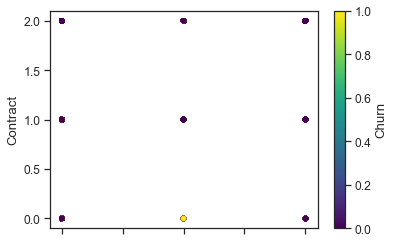

In [99]:
ax6 = df2.plot.scatter(x='InternetService',
                       y='Contract',
                       c='Churn',
                       colormap='viridis')

### GBT

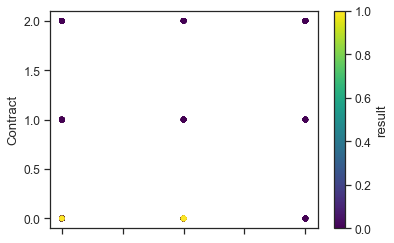

In [100]:
ax6 = final_GBT.plot.scatter(x='InternetService',
                       y='Contract',
                       c='result',
                       colormap='viridis')

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
data_for_train, target_vector, test_size=0.2, random_state=42)

In [102]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print(err_train, err_test)
gbt

0.20589279375221867 0.1937544357700497


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=11, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [103]:
predictions5 = gbt.predict(X_test)
metrics.accuracy_score(y_test, predictions5)

0.8062455642299503

In [104]:
final_GBT = X_test
final_GBT['result'] = predictions4.tolist()
final_GBT

,tenure,InternetService,Contract,result
185,1,0,0,1
2715,41,2,0,0
3825,52,2,2,0
1807,1,1,0,1
132,67,0,2,0
...,...,...,...,...
6366,64,0,2,0
315,51,1,1,0
2439,17,2,1,0
5002,69,0,2,0


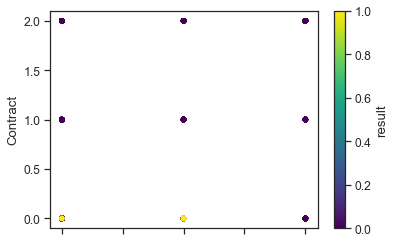

In [105]:
ax7 = final_GBT.plot.scatter(x='InternetService',
                       y='Contract',
                       c='result',
                       colormap='viridis')